In [162]:
import pandas as pd
import numpy as np
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [86]:
%matplotlib inline

In [228]:
from austransformer import realty_aus_df

Exception during reset or similar
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sqlalchemy/engine/base.py", line 739, in _rollback_impl
    self.engine.dialect.do_rollback(self.connection)
  File "/opt/anaconda3/lib/python3.7/site-packages/sqlalchemy/engine/default.py", line 530, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: Cannot operate on a closed database.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sqlalchemy/pool/base.py", line 680, in _finalize_fairy
    fairy._reset(pool)
  File "/opt/anaconda3/lib/python3.7/site-packages/sqlalchemy/pool/base.py", line 865, in _reset
    self._reset_agent.rollback()
  File "/opt/anaconda3/lib/python3.7/site-packages/sqlalchemy/engine/base.py", line 1713, in rollback
    self._do_rollback()
  File "/opt/anaconda3/lib/python3.7/site-packages/sqlalchemy/engine/base.py",

In [229]:
df = realty_aus_df

In [230]:
df.head()

,subdiv,location,data_type,status,status_extra,photo,time,mls_id,city,state,baths,sq_ft,acres,beds,zip,cost,source
0,Garden Villa Estates,"Austin, TX 78704",Residential,Active,,https://rew-feed-images.global.ssl.fastly.net/...,2019-12-21 17:20:13,6952847,Austin,TX,4.0,2326.0,0.13,4.0,78704,1059000.0,austin_realty
1,Skyland Terrace,"Austin, TX 78756",Residential,Active,,https://rew-feed-images.global.ssl.fastly.net/...,2019-12-21 17:20:13,9195794,Austin,TX,3.0,2462.0,0.15,3.0,78756,825000.0,austin_realty
2,Sunset Canyon,"Dripping Springs, TX 78620",Residential,Active,,https://rew-feed-images.global.ssl.fastly.net/...,2019-12-21 17:20:14,9881295,Dripping Springs,TX,5.0,3892.0,1.25,4.0,78620,675000.0,austin_realty
3,Saratoga Hills,"Austin, TX 78737",Residential,Active,,https://rew-feed-images.global.ssl.fastly.net/...,2019-12-21 17:20:15,1485714,Austin,TX,4.0,3030.0,1.55,4.0,78737,649632.0,austin_realty
4,Ruby Ranch,"Buda, TX 78610",Residential,Active,,https://rew-feed-images.global.ssl.fastly.net/...,2019-12-21 17:20:15,3356349,Buda,TX,2.0,2548.0,1.23,4.0,78610,499000.0,austin_realty


In [9]:
df.drop_duplicates('listingId',inplace=True)

In [10]:
df.head()

,address,city,state,zip,data_type,productId,listingId,beds,baths,details_links,lat,lon,phtos,time,cost,sq_ft,source
0,180 Grafton Ln,Austin,TX,78737,House for Sale,7546444001,2871012383,3.0,2.0,/realestateandhomes-detail/180-Grafton-Ln_Aust...,30.194215,-97.986050,https://ap.rdcpix.com/8bd1efc4145f7cc4d98e51bc...,2019-12-22 12:29:07,417000.0,2521.0,reator
1,373 Wild Rose Dr,Austin,TX,78737,House for Sale,7787562261,2870998686,4.0,3.0,/realestateandhomes-detail/373-Wild-Rose-Dr_Au...,30.170274,-97.986666,https://ap.rdcpix.com/3334e51354fe25557f562227...,2019-12-22 12:29:28,470000.0,3261.0,reator
2,11205 Jack Rabbit Trl,Austin,TX,78750,House for Sale,8364314231,2869899959,3.0,2.0,/realestateandhomes-detail/11205-Jack-Rabbit-T...,30.454676,-97.816503,https://ap.rdcpix.com/7dea14267786584abf3289ba...,2019-12-22 12:29:44,289900.0,1474.0,reator
3,2120 Cervin Blvd,Austin,TX,78728,House for Sale,8565738576,2869083635,3.0,2.0,/realestateandhomes-detail/2120-Cervin-Blvd_Au...,30.444733,-97.678207,https://ap.rdcpix.com/8e791e219efab0f03fd60dcc...,2019-12-22 12:29:53,250000.0,1222.0,reator
4,3113 Centrum Dr,Austin,TX,78754,House for Sale,7438592849,2869336239,4.0,2.5,/realestateandhomes-detail/3113-Centrum-Dr_Aus...,30.361936,-97.641732,https://ap.rdcpix.com/20bc256938c58d17c6cbee16...,2019-12-22 12:30:13,289900.0,2490.0,reator


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3576 entries, 0 to 5851
Data columns (total 17 columns):
address          3576 non-null object
city             3576 non-null object
state            3576 non-null object
zip              3576 non-null object
data_type        3576 non-null object
productId        1830 non-null object
listingId        3576 non-null object
beds             1830 non-null float64
baths            1830 non-null float64
details_links    3576 non-null object
lat              3575 non-null float64
lon              3575 non-null float64
phtos            3576 non-null object
time             3576 non-null datetime64[ns]
cost             3576 non-null float64
sq_ft            1830 non-null float64
source           3576 non-null object
dtypes: datetime64[ns](1), float64(6), object(10)
memory usage: 502.9+ KB


In [19]:
df['data_type'].value_counts()

House for Sale       2516
Condo/Townhome        745
Land                  202
Multi-Family Home      65
Mfd/Mobile Home        44
Farms/Ranches           4
Name: data_type, dtype: int64

In [156]:
clean_df = df.query("city =='Austin' and data_type == ['House for Sale','Condo/Townhome'] and beds != 'nan'")

In [157]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 0 to 2419
Data columns (total 17 columns):
address          1659 non-null object
city             1659 non-null object
state            1659 non-null object
zip              1659 non-null object
data_type        1659 non-null object
productId        1659 non-null object
listingId        1659 non-null object
beds             1659 non-null float64
baths            1659 non-null float64
details_links    1659 non-null object
lat              1659 non-null float64
lon              1659 non-null float64
phtos            1659 non-null object
time             1659 non-null datetime64[ns]
cost             1659 non-null float64
sq_ft            1659 non-null float64
source           1659 non-null object
dtypes: datetime64[ns](1), float64(6), object(10)
memory usage: 233.3+ KB


In [158]:
grouped_zip = clean_df.groupby('zip')

In [159]:
central_tend_by_zipcode = pd.DataFrame({'median':grouped_zip['cost'].median().apply(lambda x : "{:,.2f}".format(x)),
                           'mean':grouped_zip['cost'].mean().apply(lambda x : "{:,.2f}".format(x)),
                           'count':grouped_zip['cost'].count(),
                            'mean_beds':grouped_zip['beds'].mean().apply(lambda x: "{:1.0f}".format(x)),
                            'mean_baths':grouped_zip['baths'].mean().apply(lambda x: "{:1.0f}".format(x)),
                            'mean_sqft':grouped_zip['sq_ft'].mean().apply(lambda x: "{:,.0f}".format(x))
                           })

In [160]:
central_tend_by_zipcode.sort_values(['count','mean'], ascending=False)

,median,mean,count,mean_beds,mean_baths,mean_sqft
zip,,,,,,
78737,"508,242.50","558,385.74",146,4,3,"3,163"
78738,"590,900.00","652,656.01",137,4,3,"3,260"
78704,"728,000.00","862,071.53",87,3,2,"1,820"
78744,"339,945.00","329,020.45",84,3,2,"1,962"
78745,"365,000.00","388,312.11",73,3,2,"1,523"
78758,"365,900.00","373,888.07",69,3,3,"2,431"
78748,"339,500.00","333,698.91",66,3,3,"2,009"
78754,"274,490.00","288,113.52",66,4,2,"2,039"
78702,"507,000.00","556,405.40",50,3,2,"1,357"


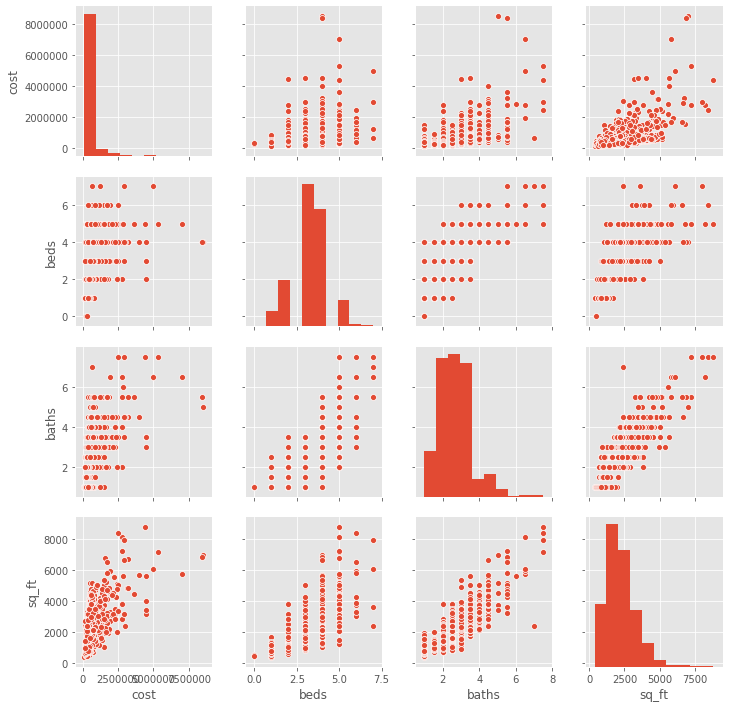

In [164]:
sns.pairplot(clean_df[['cost', 'beds', 'baths', 'sq_ft']])

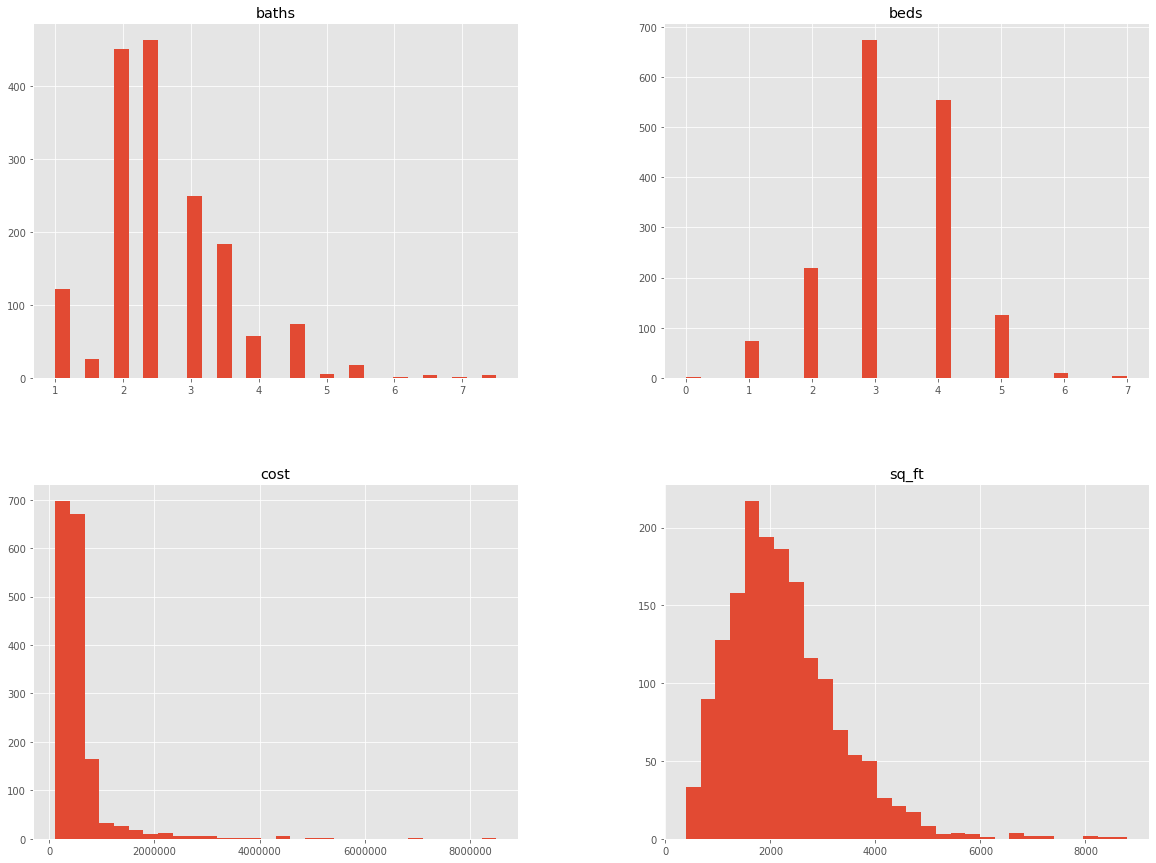

In [174]:
clean_df[['baths','beds','sq_ft','cost']].hist(bins=30, figsize=(20,15))
plt.show()

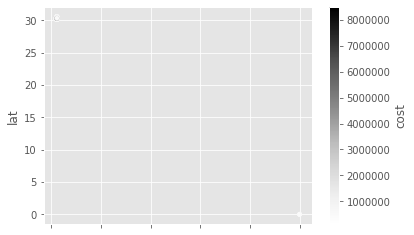

In [178]:
clean_df.plot(kind='scatter', x='lon', y='lat', c="cost")

In [208]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=False)

Start downloading data for rich info zipcode database, total size 450+MB ...
  10 MB finished ...
  20 MB finished ...
  30 MB finished ...
  40 MB finished ...
  50 MB finished ...
  60 MB finished ...
  70 MB finished ...
  80 MB finished ...
  90 MB finished ...
  100 MB finished ...
  110 MB finished ...
  120 MB finished ...
  130 MB finished ...
  140 MB finished ...
  150 MB finished ...
  160 MB finished ...
  170 MB finished ...
  180 MB finished ...
  190 MB finished ...
  200 MB finished ...
  210 MB finished ...
  220 MB finished ...
  230 MB finished ...
  240 MB finished ...
  250 MB finished ...
  260 MB finished ...
  270 MB finished ...
  280 MB finished ...
  290 MB finished ...
  300 MB finished ...
  310 MB finished ...
  320 MB finished ...
  330 MB finished ...
  340 MB finished ...
  350 MB finished ...
  360 MB finished ...
  370 MB finished ...
  380 MB finished ...
  390 MB finished ...
  400 MB finished ...
  410 MB finished ...
  420 MB finished ...
  430 MB

In [209]:
zipcode = search.by_zipcode("78704")

In [212]:
{'housing_income':zipcode.median_household_income,
'housing_units':zipcode.occupied_housing_units,
'poppulation_density':zipcode.population_density,
'pop_by_age':zipcode.population_by_age}

{'housing_income': 50930,
 'housing_units': 21335,
 'poppulation_density': 4838.0,
 'pop_by_age': [{'key': 'Male',
   'values': [{'x': 'Under 5', 'y': 1194},
    {'x': '5-9', 'y': 882},
    {'x': '10-14', 'y': 713},
    {'x': '15-19', 'y': 1043},
    {'x': '20-24', 'y': 2129},
    {'x': '25-29', 'y': 3153},
    {'x': '30-34', 'y': 2788},
    {'x': '35-39', 'y': 2139},
    {'x': '40-44', 'y': 1553},
    {'x': '45-49', 'y': 1336},
    {'x': '50-54', 'y': 1214},
    {'x': '55-59', 'y': 1110},
    {'x': '60-64', 'y': 846},
    {'x': '65-69', 'y': 459},
    {'x': '70-74', 'y': 231},
    {'x': '75-79', 'y': 211},
    {'x': '80-84', 'y': 135},
    {'x': '85 Plus', 'y': 125}]},
  {'key': 'Female',
   'values': [{'x': 'Under 5', 'y': 1169},
    {'x': '5-9', 'y': 897},
    {'x': '10-14', 'y': 687},
    {'x': '15-19', 'y': 1173},
    {'x': '20-24', 'y': 2664},
    {'x': '25-29', 'y': 3221},
    {'x': '30-34', 'y': 2447},
    {'x': '35-39', 'y': 1709},
    {'x': '40-44', 'y': 1274},
    {'x': '45-

In [227]:
pd.DataFrame(zipcode.population_by_age[2]['values'])

,x,y
0,Under 5,2363
1,5-9,1779
2,10-14,1400
3,15-19,2216
4,20-24,4793
5,25-29,6374
6,30-34,5235
7,35-39,3848
8,40-44,2827
9,45-49,2444
